In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [7]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

In [2]:
data=pd.read_csv('video_games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [82]:
na_sales=data['NA_Sales'][1:100]
eu_sales=data['EU_Sales'][1:100]
na_sales1=na_sales.values.reshape(-1,1)
eu_sales1=eu_sales.values.reshape(-1,1)

In [84]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(na_sales1,eu_sales1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
print(lr.intercept_)
print(lr.coef_)

[3.15609719]
[[0.12298177]]


# Gradient Descent vs Linear Regression

gradient descent is more of a computer friendly method where you find the optimal values by 
iterating multiple times using some learning rate , you iteratively do it multiple times
so that u reaach the minimum point.

linear regg is just minmimizing the error.

the answers vary a little

In [89]:
na_sales1.reshape(-1,1).shape

(99, 1)

In [87]:
na_sales.shape

(99,)

Text(0.5, 1.0, 'na_sales VS eu_sales')

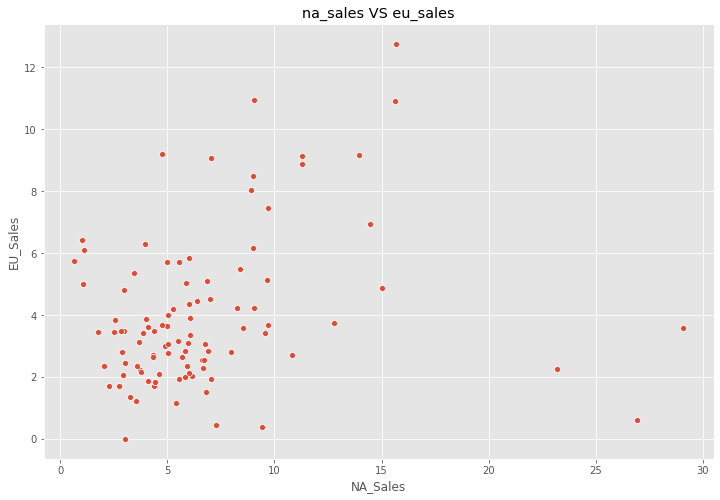

In [29]:
ax=sns.scatterplot(x=na_sales,y=eu_sales)
ax.set_title('na_sales VS eu_sales')

In [30]:
def cost_fn(X,y,theta):
    m=len(y)
    y_pred=X.dot(theta)
    error=(y-y_pred)**2
    return (1/(2*m) * np.sum(error))

In [31]:
m = len(na_sales)
X = np.append(np.ones((m, 1)),na_sales.values.reshape(m, 1), axis=1)
y = eu_sales.values.reshape(m, 1)
theta = np.zeros((2,1))

cost_fn(X, y, theta)

10.886748989898994

In [77]:
data.iloc[1:100,5:7].to_csv('slice3.csv')

In [32]:
m

99

In [50]:
l=np.sum(y**2)

In [52]:
l/198

10.886748989898994

In [35]:
theta

array([[0.],
       [0.]])

In [36]:
#alpha is the learning rate

def gradient_descent(X, y, theta, alpha, iterations): 
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_fn(X, y, theta))
        
    return theta, costs

In [37]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=1000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))

h(x) = 3.05 + 0.13x1


In [38]:
#here h(x) is the linear regression line

In [41]:
from mpl_toolkits.mplot3d import Axes3D

In [39]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_fn(X, y, t)

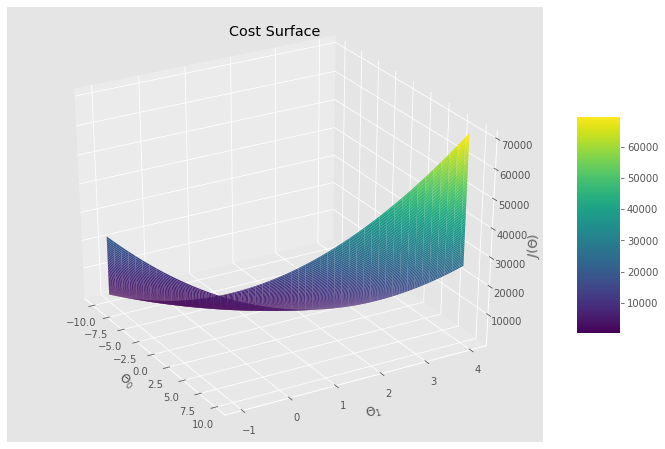

In [42]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "viridis", linewidth = 0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Cost Surface")
ax.view_init(30,330)

plt.show()

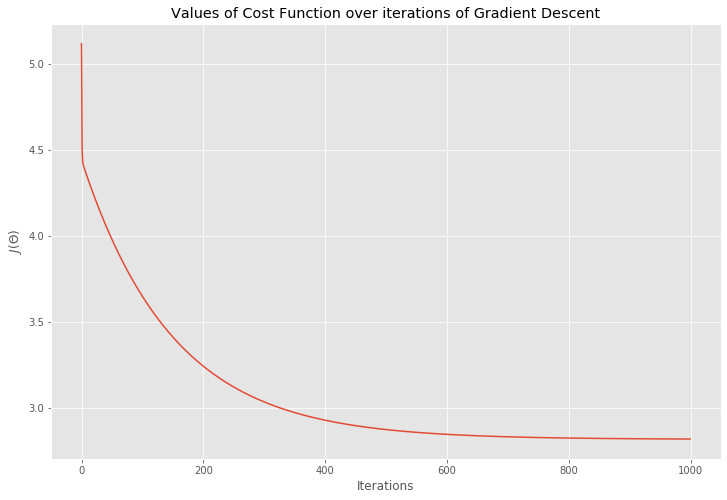

In [43]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

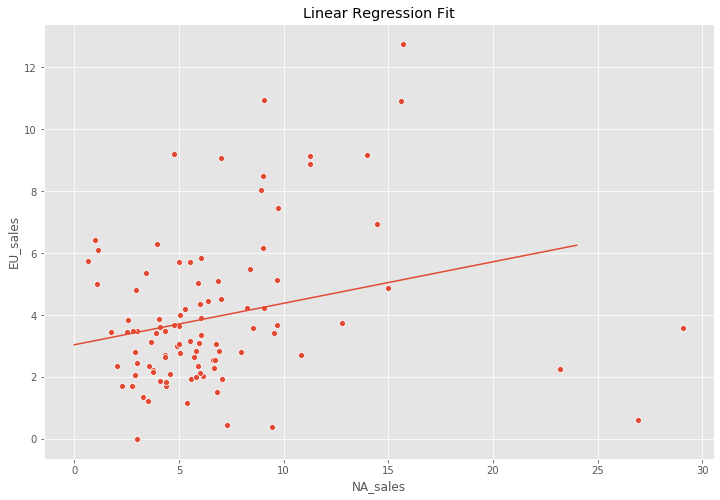

In [46]:
theta = np.squeeze(theta)
sns.scatterplot(x = na_sales,y=eu_sales)

x_value=[x for x in range(0, 25)]
y_value=[(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)

plt.xlabel("NA_sales")
plt.ylabel("EU_sales")
plt.title("Linear Regression Fit");

In [47]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [48]:
y_pred_1 = predict(np.array([1, 4]),theta) * 10000
print("For a NA_sales of 40,000, the model predicts a EU_sales of" + str(round(y_pred_1, 0)))

For a NA_sales of 40,000, the model predicts a EU_sales of35826.0
